<a href="https://colab.research.google.com/github/EduPiza/Trabalho_IA_MachineLearning/blob/main/Trabalho_DataSet_ADULT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# FIAP - FACULDADE DE INFORMÁTICA E ADMINISTRAÇÃO PAULISTA
#
# DISCIPLINA: AI & MACHINE LEARNING
#
# PROFESSOR DR. JOSE AHIRTON LOPES
#
# ALUNOS: RM344853 EDUARDO GOMES PIZA
#         RM344858 FABRICIO ORFEU MERLO
#         RM344965 HOMERO HUBER DE PÁDUA MAGALHÃES
#         RM344930 WEBER CORGOSINHO AMARO

In [2]:
# Este código foi implementado visando a exemplificação prática
# do processo de geração de modelo preditivo "similar" ao modelo
# sugerido em nosso trabalho final, onde a partir de um grupo 
# de dados de entrada teremos como resultado uma "classificação"

In [3]:
# Lendo o DATASET diretamente da URL:

import pandas as pd
baseDadosCSV = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [4]:
# Visualizando o DataFrame
baseDadosCSV

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# Vamos acrescentar o cabecalho ao DataFrame para facilitar o uso

cabecalho = [ 'idade', 'tipo_emprego', 'nr_seql', 'escolaridade', 'tempo_estudo', 'estado_civil', 'ocupacao', 'relacionamento', 'raca', 'genero', 'ganho_capital',
             'perda_capital', 'horas_trab_semana', 'pais_origem', 'renda']

baseDadosCSV.to_csv("arqtemp.csv", header=cabecalho, index=False) 
baseDadosCSV2 = pd.read_csv("arqtemp.csv")

# Visualizando o DataFrame com o cabecalho:
baseDadosCSV2

,idade,tipo_emprego,nr_seql,escolaridade,tempo_estudo,estado_civil,ocupacao,relacionamento,raca,genero,ganho_capital,perda_capital,horas_trab_semana,pais_origem,renda
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
# Iniciando o processo de extração/transformação vamos excluir do 
# DataFrame o atributo/feature 'nr_seql'

baseDadosCSV2 = baseDadosCSV2.drop(columns=['nr_seql'])

# Visualizando o DataFrame sem a coluna excluída
baseDadosCSV2

,idade,tipo_emprego,escolaridade,tempo_estudo,estado_civil,ocupacao,relacionamento,raca,genero,ganho_capital,perda_capital,horas_trab_semana,pais_origem,renda
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
# Vamos agora avaliar as colunas com dados categóricos e analisar
# a substituição por valores numéricos

baseDadosCSV2['tipo_emprego'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: tipo_emprego, dtype: int64

In [8]:
# Substituindo na coluna "tipo_emprego"

baseDadosCSV2['tipo_emprego'] = baseDadosCSV2['tipo_emprego'].map({' Private':0,
                             ' Self-emp-not-inc':1,
                             ' Local-gov':2,
                             ' ?':3,
                             ' State-gov':4,
                             ' Self-emp-inc':5,
                             ' Federal-gov':6,
                             ' Without-pay':7,
                             ' Never-worked':8},
                             na_action=None)

In [9]:
# Analisando 'escolaridade'

baseDadosCSV2['escolaridade'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: escolaridade, dtype: int64

In [10]:
# Substituindo na coluna "escolaridade"

baseDadosCSV2['escolaridade'] = baseDadosCSV2['escolaridade'].map({' HS-grad':0,
                             ' Some-college':1,
                             ' Bachelors':2,
                             ' Masters':3,
                             ' Assoc-voc':4,
                             ' 11th':5,
                             ' Assoc-acdm':6,
                             ' 10th':7,
                             ' 7th-8th':8,
                             ' Prof-school':9,
                             ' 9th':10,
                             ' 12th':11,
                             ' Doctorate':12,
                             ' 5th-6th':13,
                             ' 1st-4th':14,
                             ' Preschool':15},
                             na_action=None)

In [11]:
baseDadosCSV2['escolaridade'].value_counts()

0     10501
1      7291
2      5354
3      1723
4      1382
5      1175
6      1067
7       933
8       646
9       576
10      514
11      433
12      413
13      333
14      168
15       51
Name: escolaridade, dtype: int64

In [12]:
# Analisando 'estado_civil'

baseDadosCSV2['estado_civil'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: estado_civil, dtype: int64

In [13]:
# Substituindo na coluna "estado_civil"

baseDadosCSV2['estado_civil'] = baseDadosCSV2['estado_civil'].map({' Married-civ-spouse':0,
                             ' Never-married':1,
                             ' Divorced':2,
                             ' Separated':3,
                             ' Widowed':4,
                             ' Married-spouse-absent':5,
                             ' Married-AF-spouse':6},
                             na_action=None)

In [14]:
baseDadosCSV2['estado_civil'].value_counts()

0    14976
1    10682
2     4443
3     1025
4      993
5      418
6       23
Name: estado_civil, dtype: int64

In [15]:
# Analisando 'ocupacao'

baseDadosCSV2['ocupacao'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: ocupacao, dtype: int64

In [16]:
# Substituindo na coluna "ocupacao"

baseDadosCSV2['ocupacao'] = baseDadosCSV2['ocupacao'].map({' Prof-specialty':0,
                             ' Craft-repair':1,
                             ' Exec-managerial':2,
                             ' Adm-clerical':3,
                             ' Sales':4,
                             ' Other-service':5,
                             ' Machine-op-inspct':6,
                             ' ?':7,
                             ' Transport-moving':8,
                             ' Handlers-cleaners':9,
                             ' Farming-fishing':10,
                             ' Tech-support':11,
                             ' Protective-serv':12,
                             ' Priv-house-serv':13,
                             ' Armed-Forces':14},
                             na_action=None)

In [17]:
baseDadosCSV2['ocupacao'].value_counts()

0     4140
1     4099
2     4066
3     3769
4     3650
5     3295
6     2002
7     1843
8     1597
9     1370
10     994
11     928
12     649
13     149
14       9
Name: ocupacao, dtype: int64

In [18]:
# Analisando 'relacionamento'

baseDadosCSV2['relacionamento'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relacionamento, dtype: int64

In [19]:
# Substituindo na coluna "relacionamento"

baseDadosCSV2['relacionamento'] = baseDadosCSV2['relacionamento'].map({' Husband':0,
                             ' Not-in-family':1,
                             ' Own-child':2,
                             ' Unmarried':3,
                             ' Wife':4,
                             ' Other-relative':5},
                             na_action=None)

In [20]:
baseDadosCSV2['relacionamento'].value_counts()

0    13193
1     8304
2     5068
3     3446
4     1568
5      981
Name: relacionamento, dtype: int64

In [21]:
# Analisando 'raca'

baseDadosCSV2['raca'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: raca, dtype: int64

In [22]:
# Substituindo na coluna "raca"

baseDadosCSV2['raca'] = baseDadosCSV2['raca'].map({' White':0,
                             ' Black':1,
                             ' Asian-Pac-Islander':2,
                             ' Amer-Indian-Eskimo':3,
                             ' Other':4},
                             na_action=None)

In [23]:
baseDadosCSV2['raca'].value_counts()

0    27815
1     3124
2     1039
3      311
4      271
Name: raca, dtype: int64

In [24]:
# Analisando 'genero'

baseDadosCSV2['genero'].value_counts()

 Male      21789
 Female    10771
Name: genero, dtype: int64

In [25]:
# Substituindo na coluna "genero"

baseDadosCSV2['genero'] = baseDadosCSV2['genero'].map({' Male':0,
                             ' Female':1},
                             na_action=None)

In [26]:
baseDadosCSV2['genero'].value_counts()

0    21789
1    10771
Name: genero, dtype: int64

In [27]:
# Analisando 'pais_origem'

baseDadosCSV2['pais_origem'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [28]:
# Substituindo na coluna "pais_origem"

baseDadosCSV2['pais_origem'] = baseDadosCSV2['pais_origem'].map({' United-States':0,
                             ' Mexico':1,
                             ' ?':2,
                             ' Philippines':3,
                             ' Germany':4,
                             ' Canada':5,
                             ' Puerto-Rico':6,
                             ' El-Salvador':7,
                             ' India':8,
                             ' Cuba':9,
                             ' England':10,
                             ' Jamaica':11,
                             ' South':12,
                             ' China':13,
                             ' Italy':14,
                             ' Dominican-Republic':15,
                             ' Vietnam':16,
                             ' Guatemala':17,
                             ' Japan':18,
                             ' Poland':19,
                             ' Columbia':20,
                             ' Taiwan':21,
                             ' Haiti':22,
                             ' Iran':23,
                             ' Portugal':24,
                             ' Nicaragua':25,
                             ' Peru':26,
                             ' France':27,
                             ' Greece':28,
                             ' Ecuador':29,
                             ' Ireland':30,
                             ' Hong':31,
                             ' Cambodia':32,
                             ' Trinadad&Tobago':33,
                             ' Laos':34,
                             ' Thailand':35,
                             ' Yugoslavia':36,
                             ' Outlying-US(Guam-USVI-etc)':37,
                             ' Honduras':38,
                             ' Hungary':39,
                             ' Scotland':40,
                             ' Holand-Netherlands':41},
                             na_action=None)

In [29]:
baseDadosCSV2['pais_origem'].value_counts()

0     29169
1       643
2       583
3       198
4       137
5       121
6       114
7       106
8       100
9        95
10       90
11       81
12       80
13       75
14       73
15       70
16       67
17       64
18       62
19       60
20       59
21       51
22       44
23       43
24       37
25       34
26       31
27       29
28       29
29       28
30       24
31       20
32       19
33       19
34       18
35       18
36       16
37       14
38       13
39       13
40       12
41        1
Name: pais_origem, dtype: int64

In [30]:
# Analisando 'renda'

baseDadosCSV2['renda'].value_counts()

 <=50K    24719
 >50K      7841
Name: renda, dtype: int64

In [31]:
# Substituindo na coluna "renda"

baseDadosCSV2['renda'] = baseDadosCSV2['renda'].map({' <=50K':0,
                             ' >50K':1},
                             na_action=None)

In [32]:
baseDadosCSV2['renda'].value_counts()

0    24719
1     7841
Name: renda, dtype: int64

In [33]:
# Visualizando todo o DataFrame após estas atualizações:

baseDadosCSV2.head(15)

,idade,tipo_emprego,escolaridade,tempo_estudo,estado_civil,ocupacao,relacionamento,raca,genero,ganho_capital,perda_capital,horas_trab_semana,pais_origem,renda
0,50,1,2,13,0,2,0,0,0,0,0,13,0,0
1,38,0,0,9,2,9,1,0,0,0,0,40,0,0
2,53,0,5,7,0,9,0,1,0,0,0,40,0,0
3,28,0,2,13,0,0,4,1,1,0,0,40,9,0
4,37,0,3,14,0,2,4,0,1,0,0,40,0,0
5,49,0,10,5,5,5,1,1,1,0,0,16,11,0
6,52,1,0,9,0,2,0,0,0,0,0,45,0,1
7,31,0,3,14,1,0,1,0,1,14084,0,50,0,1
8,42,0,2,13,0,2,0,0,0,5178,0,40,0,1
9,37,0,1,10,0,2,0,1,0,0,0,80,0,1


In [34]:
# A partir deste ponto o procedimento adequado seria ralizar uma análise exploratória 
# dos dados, procurar por outliers, encontrar a correlação entre as features, etc. 
# mas como trata-se apenas de exemplificação optamos por apenas executar os procedi-
# mentos de treino e exibir a Matriz de Confusão com os dados gerados.

In [35]:
# Primeiro vamos realizar todos os procedimentos com a base 
# mantendo as proporções atuais (75,9% de registros com renda
# inferior/igual a 50k, e 24,1% de registros com renda >50k)

# importando o módulo que vamos usar
from sklearn.model_selection import train_test_split 

# Separando o DataFrame de entrada em 'features' e 'label'
X = baseDadosCSV2.iloc[:, 0:13]
y = baseDadosCSV2.iloc[:, 13:14]

# Executando o módulo seprando 90% da base para treino, mantendo a 
# proporção de registros conforme o label 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.9, 
                                                    random_state=42, 
                                                    stratify=y)

In [36]:
# Visualizando os registros "separados"
X_train.head()

,idade,tipo_emprego,escolaridade,tempo_estudo,estado_civil,ocupacao,relacionamento,raca,genero,ganho_capital,perda_capital,horas_trab_semana,pais_origem
12110,23,0,1,10,1,2,2,0,0,0,0,40,0
490,46,6,0,9,2,3,1,0,0,0,0,40,0
25946,42,0,0,9,0,6,4,0,1,0,0,40,0
1939,39,0,1,10,0,10,0,0,0,0,0,45,0
14491,22,0,0,9,1,0,2,0,1,0,0,20,0


In [37]:
# Visualizando os registros "separados"
y_train.head()

,renda
12110,0
490,0
25946,1
1939,0
14491,0


In [38]:
# Visualizando os registros "separados"
X_test.head()

,idade,tipo_emprego,escolaridade,tempo_estudo,estado_civil,ocupacao,relacionamento,raca,genero,ganho_capital,perda_capital,horas_trab_semana,pais_origem
5109,21,0,1,10,1,6,2,0,0,0,0,40,0
30064,36,0,1,10,0,1,0,0,0,3137,0,50,7
1694,51,0,0,9,0,6,0,1,0,0,1902,40,0
7616,34,0,0,9,1,2,3,0,1,0,0,20,10
22098,33,4,1,10,1,11,1,0,1,0,0,40,0


In [39]:
# Visualizando os registros "separados"
y_test.head()

,renda
5109,0
30064,0
1694,1
7616,0
22098,0


In [40]:
# Agora que temos os dados separados (features e labels, tanto de treino como
# de teste) podemos criar um modelo de classificação.

In [41]:
# Primeiro modelo usando GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inicializando o Classificador
class_gnb = GaussianNB()

# Treinando o Classificador e fazendo o 'predict'
model1 = class_gnb.fit(X_train, y_train.values.ravel())
pred1 = class_gnb.predict(X_test)

# Avaliando a precisão
print("Foi obtida uma precisão de", round((accuracy_score(y_test, pred1) * 100), 2), "% com o GaussianNB")

Foi obtida uma precisão de 80.96 % com o GaussianNB


In [42]:
# Verificando as métricas referentes a precisão (Precisão, Recall e F1 Score)

from sklearn.metrics import classification_report
print (classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      2472
           1       0.70      0.37      0.48       784

    accuracy                           0.81      3256
   macro avg       0.76      0.66      0.68      3256
weighted avg       0.80      0.81      0.79      3256



In [43]:
# Verificando a matriz de confusão

from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, pred1))

[[2346  126]
 [ 494  290]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


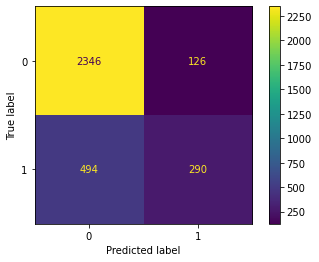

In [44]:
# Plotando a matriz de confusão

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(class_gnb, X_test, y_test)  
plt.show()

In [45]:
# De posse dos resultados acima iniciaríamos a verificação dos hiperparâmetros
# usados na geração da massa de teste, geração do modelo, etc. para tentar 
# melhorar os resultados obtidos! 
# Analisando a matriz de confusão plotada percebe-se que foram preditos muitos
# salários com valor abaixo de 50k (494) que na verdade seriam maiores que 50k

# Vamos fazer um novo teste utilizando o K-Nearest Neighbors, um outro modelo 
# de classificação


In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train.values.ravel())
pred2 = knn_classifier.predict(X_test)

# Avaliando a precisão
print("Foi obtida uma precisão de", round((accuracy_score(y_test, pred2) * 100), 2), "% com o KNeighborsClassifier")

Foi obtida uma precisão de 85.32 % com o KNeighborsClassifier


In [47]:
# Verificando as métricas referentes a precisão (Precisão, Recall e F1 Score)

print (classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2472
           1       0.72      0.64      0.68       784

    accuracy                           0.85      3256
   macro avg       0.80      0.78      0.79      3256
weighted avg       0.85      0.85      0.85      3256



In [48]:
# Verificando a matriz de confusão

print (confusion_matrix(y_test, pred2))

[[2276  196]
 [ 282  502]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


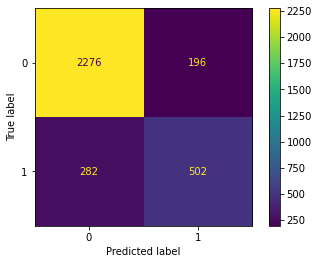

In [49]:
plot_confusion_matrix(knn_classifier, X_test, y_test)  
plt.show()

In [50]:
# Repare que a simples mudança do modelo de classificação usado
# (utilizando os mesmos arquivos de treino e teste) geraram re-
# sultados distintos, com uma melhoria considerável com a pre-
# dição do segundo modelo (KNeighborsClassifier)

In [51]:
# Vamos fazer mais uma classificação agora utilizando o 
# RandomForest

from sklearn.ensemble import RandomForestClassifier

# Inicializando o classificador
clf_RF = RandomForestClassifier(n_estimators = 100)

# Treinando o modelo
clf_RF.fit(X_train, y_train.values.ravel())

# Realizando a predição
pred3 = clf_RF.predict(X_test)

# Avaliando a precisão
print("Foi obtida uma precisão de", round((accuracy_score(y_test, pred3) * 100), 2), "% com o RandomForestClassifier")


Foi obtida uma precisão de 85.63 % com o RandomForestClassifier


In [52]:
# Verificando as métricas referentes a precisão (Precisão, Recall e F1 Score)

print (classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2472
           1       0.73      0.64      0.68       784

    accuracy                           0.86      3256
   macro avg       0.81      0.78      0.79      3256
weighted avg       0.85      0.86      0.85      3256



In [53]:
# Verificando a matriz de confusão

print (confusion_matrix(y_test, pred3))

[[2289  183]
 [ 285  499]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


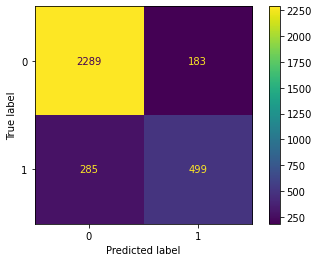

In [54]:
plot_confusion_matrix(clf_RF, X_test, y_test)  
plt.show()

In [69]:
# Vamos agora para a nossa última classificação, desta vez usando
# DecisionTree

from sklearn.tree import DecisionTreeClassifier

# Inicializando o modelo
dtree = DecisionTreeClassifier()

# Treinando o modelo
dtree.fit(X_train, y_train.values.ravel())

# Realizando a predição
pred4 = dtree.predict(X_test)

# Avaliando a precisão
print("Foi obtida uma precisão de", round((accuracy_score(y_test, pred4) * 100), 2), "% com o DecisionTreeClassifier")


Foi obtida uma precisão de 83.05 % com o DecisionTreeClassifier


In [56]:
# Verificando as métricas referentes a precisão (Precisão, Recall e F1 Score)

print (classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2472
           1       0.64      0.64      0.64       784

    accuracy                           0.83      3256
   macro avg       0.76      0.76      0.76      3256
weighted avg       0.83      0.83      0.83      3256



In [57]:
# Verificando a matriz de confusão

print (confusion_matrix(y_test, pred4))

[[2194  278]
 [ 284  500]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


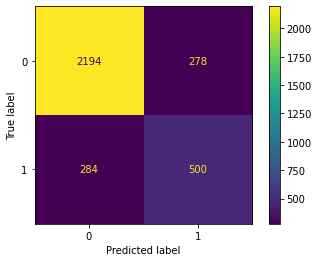

In [58]:
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show()